In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_csv("data/iris_dataset.csv")
iris.head(5)

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa


iris : 150 individus, iris_dna : 146 individus


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


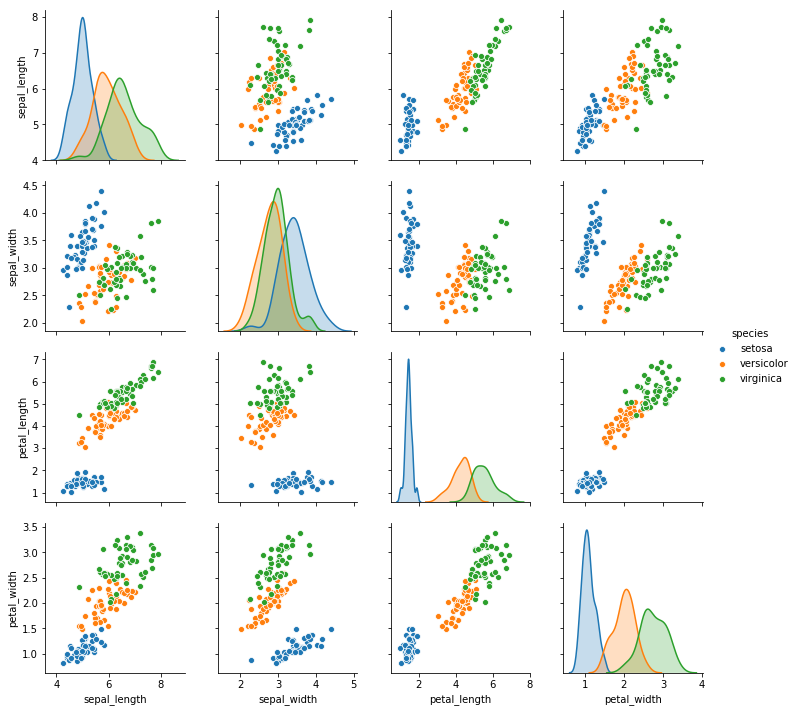

In [2]:
# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

In [3]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

---

## Q1 :
### –– Coefficients de corrélation linéaires

In [4]:
import scipy.stats as st

print("petal_width en fonction de petal_length :")
print(st.pearsonr(iris_dna["petal_width"], iris_dna["petal_length"])[0])

petal_width en fonction de petal_length :
0.9418817573025173


In [5]:
print("sepal_width en fonction de petal_width :")
print(st.pearsonr(iris_dna["petal_width"], iris_dna["sepal_width"])[0])

sepal_width en fonction de petal_width :
-0.24797130615784596


## Q2 :
### –– Commentez les résultats de la question 1

petal_width en fonction de petal_length :
0.9418817573025173


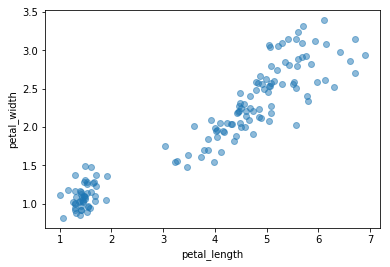

In [6]:
plt.plot(iris_dna["petal_length"], iris_dna["petal_width"], 'o', alpha=0.5)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
print("petal_width en fonction de petal_length :")
print(st.pearsonr(iris_dna["petal_width"], iris_dna["petal_length"])[0])
plt.show()

La corrélation linéaire est très forte (proche de 1), ce qui est corroboré par le scatterplot qui montre une corrélation linéaire positive entre les deux variables.

sepal_width en fonction de petal_width :
-0.24797130615784596


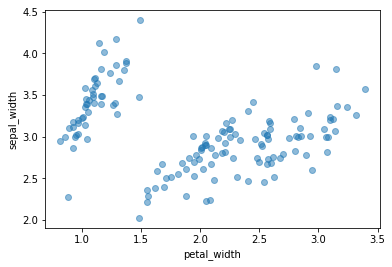

In [7]:
plt.plot(iris_dna["petal_width"], iris_dna["sepal_width"], 'o', alpha=0.5)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
print("sepal_width en fonction de petal_width :")
print(st.pearsonr(iris_dna["petal_width"], iris_dna["sepal_width"])[0])
plt.show()

La corrélation linéaire est négative et proche de 0, les variables semblent peu corrélées entre elles. Le scatterplot montre toutefois qu'il existe une corrélation linéaire positive jusqu'à petal_width = 1.5, puis la valeur de sepal_width chute brutalement et la relation redevient à nouveau assez linéaire.

*Note : si on s'intéresse à la relation sepal_width/petal_width pour les différentes espèces d'iris, on découvre qu'elles sont corrélées positivement, ce qui explique les différentes corrélations linéaires découvertes en étudiant le scatterplot. En somme, la largeur du sépale ne permet pas de prédire la largeur du pétale d'une fleur sans en connaître l'espèce. Si on se concentre sur les différentes espèces d'iris, cela devient possible.*
- *sepal_width en fonction de petal_width sur iris_setosa : 0.753*
- *sepal_width en fonction de petal_width sur iris_virginica : 0.685*
- *sepal_width en fonction de petal_width sur iris_versicolor : 0.825*

## Q3 :
### –– Régressions linéaires

### –––– Cas 1

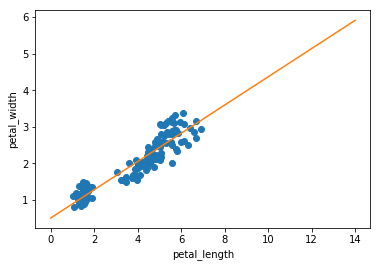

a vaut 0.38599421003086465 !
b vaut 0.5092683365300003 !


In [8]:
import numpy as np
import statsmodels.api as sm

X = iris_dna[['petal_length']]
Y = iris_dna['petal_width']
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a1, b1 = result.params['petal_length'], result.params['intercept']

plt.plot(iris_dna.petal_length, iris_dna.petal_width, "o")
plt.plot(np.arange(15),[a1*x+b1 for x in np.arange(15)])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()
print('a vaut {} !'.format(a1))
print('b vaut {} !'.format(b1))

### –––– Cas 2

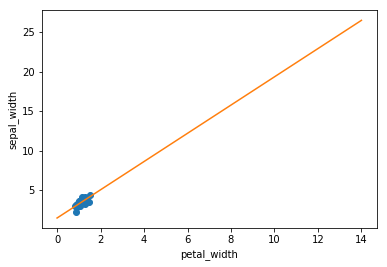

a vaut 1.7875014940283396 !
b vaut 1.4593274917352779 !


In [9]:
X = iris_setosa[['petal_width']]
Y = iris_setosa['sepal_width']
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a2, b2 = result.params['petal_width'], result.params['intercept']

plt.plot(iris_setosa.petal_width, iris_setosa.sepal_width, "o")
plt.plot(np.arange(15),[a2*x+b2 for x in np.arange(15)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()
print('a vaut {} !'.format(a2))
print('b vaut {} !'.format(b2))

### –––– Cas 3

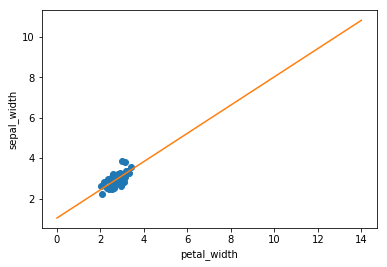

a vaut 0.6992505959712975 !
b vaut 1.0377429413261892 !


In [10]:
X = iris_virginica[['petal_width']]
Y = iris_virginica['sepal_width']
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a3, b3 = result.params['petal_width'], result.params['intercept']

plt.plot(iris_virginica.petal_width, iris_virginica.sepal_width, "o")
plt.plot(np.arange(15),[a3*x+b3 for x in np.arange(15)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()
print('a vaut {} !'.format(a3))
print('b vaut {} !'.format(b3))

### –––– Cas 4

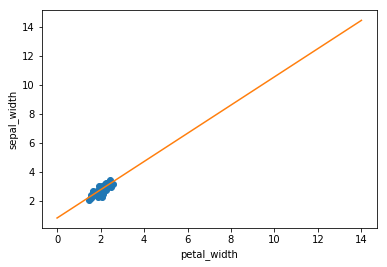

a vaut 0.9735704312621848 !
b vaut 0.8094893720788445 !


In [11]:
X = iris_versicolor[['petal_width']]
Y = iris_versicolor['sepal_width']
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a4, b4 = result.params['petal_width'], result.params['intercept']

plt.plot(iris_versicolor.petal_width, iris_versicolor.sepal_width, "o")
plt.plot(np.arange(15),[a4*x+b4 for x in np.arange(15)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()
print('a vaut {} !'.format(a4))
print('b vaut {} !'.format(b4))

## Q4 :

In [13]:
coeffs = {
    "cas 1" : {'a': a1 , 'b': b1},
    "cas 2" : {'a': a2 , 'b': b2},
    "cas 3" : {'a': a3 , 'b': b3},
    "cas 4" : {'a': a4 , 'b': b4},
}

lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_width"]
        Y = a*X + b
        iris.loc[i,"sepal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))

On a complété sepal_width par 0.8961671500978726 a partir de l'espece:setosa et de petal_width=1.0023435676326218
On a complété petal_width par 2.0639904746744127 a partir de petal_length=4.027837977207209
On a complété sepal_width par 1.381597619478977 a partir de l'espece:versicolor et de petal_width=2.259954321281721
On a complété sepal_width par 1.7914918492334118 a partir de l'espece:virginica et de petal_width=3.3218723995908728
